In [2]:
from poisson_sprinkling import *
import numpy as np

In [18]:
L = 1
T = 10
# ls = np.linspace(0.5, T, 10, endpoint=False)
rho = 100
runs = 10

ls = np.linspace(np.sqrt(10 / 100), 0.1 * T, 10, endpoint=False)

In [19]:
# N_rel_totals = {}
# N_rel_square_totals = {}
ordering_fracs_totals = {}
ordering_fracs_square_totals = {}
run_totals = {}

In [22]:
points = poisson_sprinkle_rectangular(rho, xlims = [0, L], tlims=[0, T])
relations = find_relations_cylinder(points, L)
for l in ls:
    vol = l**2 * rho
    if vol not in ordering_fracs_totals:
        ordering_fracs_totals[vol] = 0
        ordering_fracs_square_totals[vol] = 0
        run_totals[vol] = 0
    for run_num in range(runs):
        point_subset, x_c, t_c = aleksandrov_interval_sample(points, l, L, T)
        position_subset = generate_position_subset(points, point_subset)
        relations_subset = generate_relations_subset(relations, point_subset)
        total_rel = 0
        for i in relations_subset:
            total_rel += len(relations_subset[i])
        ordering_frac = len(point_subset) / total_rel**2
        ordering_fracs_totals[vol] += ordering_frac
        ordering_fracs_square_totals[vol] += ordering_frac**2
        run_totals[vol] += 1
        

In [23]:
ordering_fracs_totals

{10.0: 0.641127443576578,
 14.792099788303084: 0.22837957254017507,
 20.519288512538814: 0.07305782893739873,
 27.1815661727072: 0.018257572131581107,
 34.778932768808225: 0.008611311159696685,
 43.311388300841905: 0.005694437973550598,
 52.77893276880823: 0.002232626330770157,
 63.18156617270719: 0.0017367554450274211,
 74.51928851253882: 0.0006918992044188612,
 86.79209978830308: 0.0006010903978932378}

In [25]:
ordering_means = [ordering_fracs_totals[r] / run_totals[r] for r in ordering_fracs_totals]
vols = [r for r in ordering_fracs_totals]

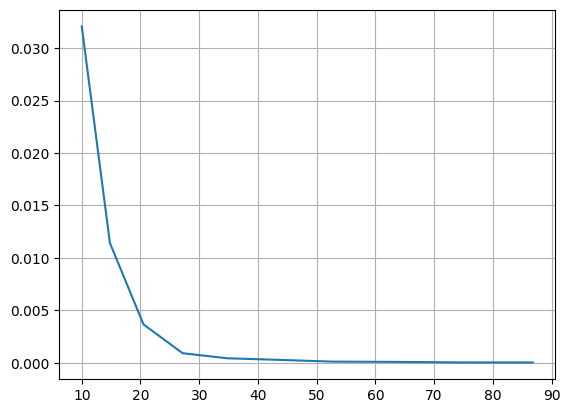

In [27]:
plt.grid()
plt.plot(vols, ordering_means)